# EDA for Vaccine Scheduled Dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv("../data/processed/vaccine_schedule_cleaned.csv")

## Basic Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8053 entries, 0 to 8052
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   iso_3_code             8053 non-null   object 
 1   countryname            8053 non-null   object 
 2   who_region             8053 non-null   object 
 3   year                   8053 non-null   int64  
 4   vaccinecode            8053 non-null   object 
 5   vaccine_description    8053 non-null   object 
 6   schedulerounds         8052 non-null   float64
 7   targetpop              8053 non-null   object 
 8   targetpop_description  8053 non-null   object 
 9   geoarea                8053 non-null   object 
 10  ageadministered        8053 non-null   object 
 11  sourcecomment          8053 non-null   object 
 12  is_risk_group          8053 non-null   int64  
 13  schedule_num           8052 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 880.9+

In [4]:
df.head()

,iso_3_code,countryname,who_region,year,vaccinecode,vaccine_description,schedulerounds,targetpop,targetpop_description,geoarea,ageadministered,sourcecomment,is_risk_group,schedule_num
0,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1.0,Unknown,General/routine,National,M2,Unknown,0,1.0
1,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2.0,Unknown,General/routine,National,M4,Unknown,0,2.0
2,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3.0,Unknown,General/routine,National,M6,Unknown,0,3.0
3,ABW,Aruba,AMRO,2023,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,4.0,B_2YL_W,General/routine,National,M15,Unknown,0,4.0
4,ABW,Aruba,AMRO,2023,DTAPIPV,DTaP-IPV (acellular) vaccine,5.0,B_CHILD_W,General/routine,National,Y4,Unknown,0,5.0


In [5]:
df.isnull().sum()

iso_3_code               0
countryname              0
who_region               0
year                     0
vaccinecode              0
vaccine_description      0
schedulerounds           1
targetpop                0
targetpop_description    0
geoarea                  0
ageadministered          0
sourcecomment            0
is_risk_group            0
schedule_num             1
dtype: int64

In [6]:
df.shape

(8053, 14)

## Sumamry Statistics

In [8]:
df.describe(include = 'all')

,iso_3_code,countryname,who_region,year,vaccinecode,vaccine_description,schedulerounds,targetpop,targetpop_description,geoarea,ageadministered,sourcecomment,is_risk_group,schedule_num
count,8053,8053,8053,8053.000000,8053,8053,8052.000000,8053,8053,8053,8053,8053,8053.000000,8052.000000
unique,214,214,7,NaN,87,87,NaN,16,11,3,426,1434,NaN,NaN
top,RUS,Russian Federation,EURO,NaN,TD_S,Td (Tetanus toxoid and diphtheria for older ch...,NaN,Unknown,General/routine,National,Unknown,Unknown,NaN,NaN
freq,126,126,2156,NaN,967,967,NaN,4258,4695,7788,1046,2914,NaN,NaN
mean,NaN,NaN,NaN,2022.690302,NaN,NaN,2.053403,NaN,NaN,NaN,NaN,NaN,0.154849,2.053403
std,NaN,NaN,NaN,22.546942,NaN,NaN,1.316560,NaN,NaN,NaN,NaN,NaN,0.361783,1.316560
min,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,2023.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
50%,NaN,NaN,NaN,2023.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000
75%,NaN,NaN,NaN,2023.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,0.000000,3.000000


## Vaccine Schedule Count Per Year

In [7]:
schedule_by_year = df.groupby("year")['vaccinecode'].count().reset_index()

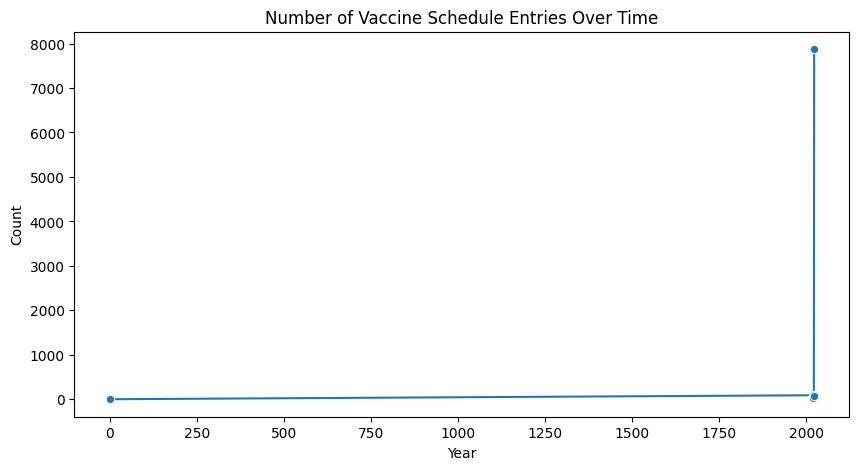

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(data=schedule_by_year, x="year", y="vaccinecode", marker="o")
plt.title("Number of Vaccine Schedule Entries Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.savefig("../output/Vaccine_Schedule/Number of Vaccine Schedule Entries Over Time.png")
plt.show()

## Most Common Vaccines in Schedule

In [13]:
top_vaccines = df['vaccine_description'].value_counts().head(10)

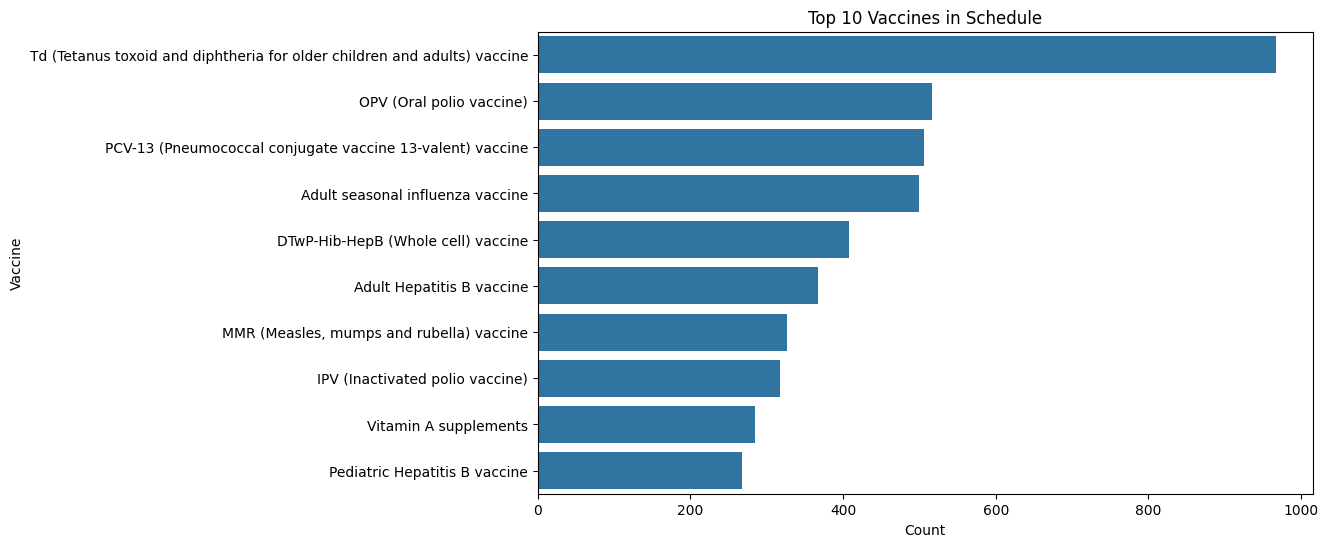

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_vaccines.values, y=top_vaccines.index)
plt.title("Top 10 Vaccines in Schedule")
plt.xlabel("Count")
plt.ylabel("Vaccine")
plt.savefig("../output/Vaccine_Schedule/Top 10 Vaccines in Schedule.png")
plt.show()

## Average number of doses (schedule_num) per vaccine

In [20]:
avg_doses = df.groupby("vaccine_description")['schedule_num'].mean().sort_values(ascending = False).head(10)

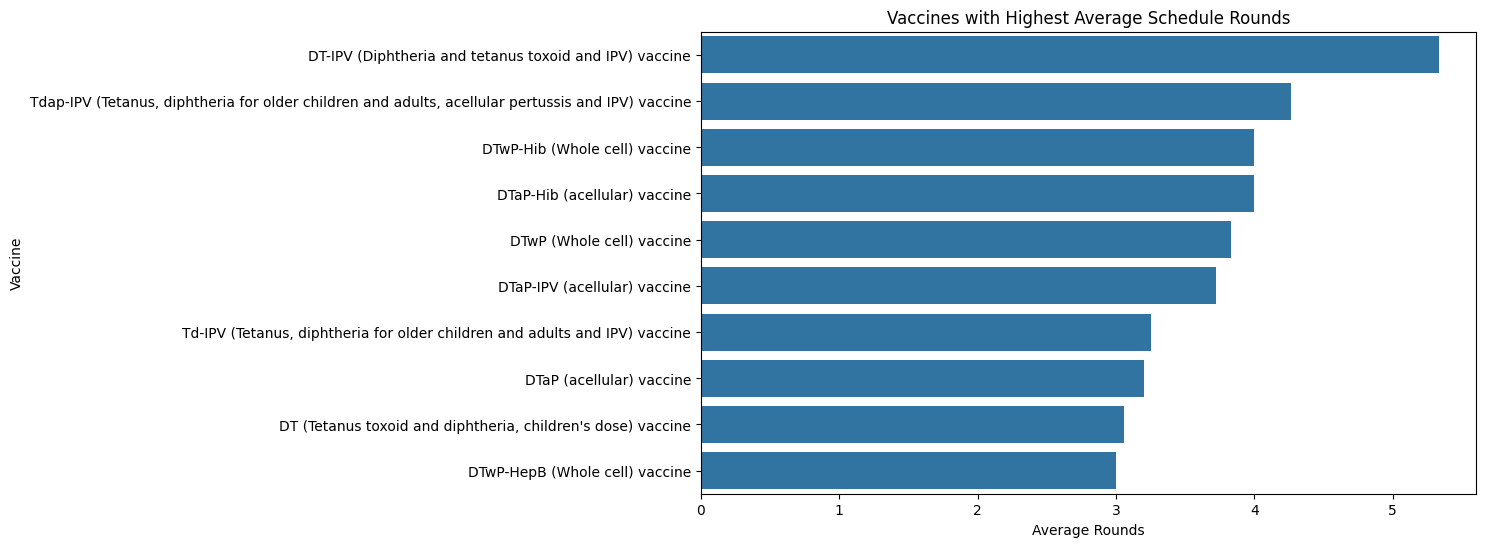

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_doses.values, y=avg_doses.index)
plt.title("Vaccines with Highest Average Schedule Rounds")
plt.xlabel("Average Rounds")
plt.ylabel("Vaccine")
plt.savefig("../output/Vaccine_Schedule/Vaccines with Highest Average Schedule Rounds.png")
plt.show()

##  Vaccine schedules by WHO Region

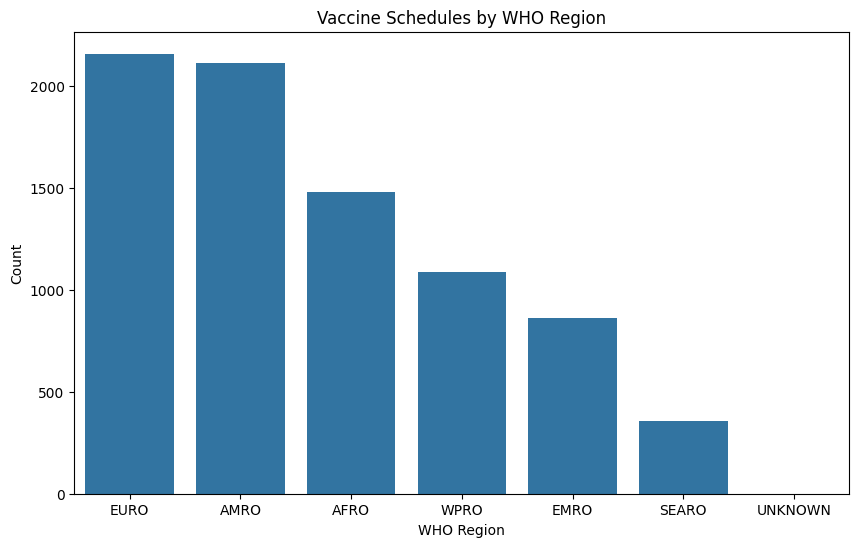

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="who_region", order=df['who_region'].value_counts().index)
plt.title("Vaccine Schedules by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Count")
plt.savefig("../output/Vaccine_Schedule/Vaccine Schedules by WHO Region.png")
plt.show()

## Age of administration analysis

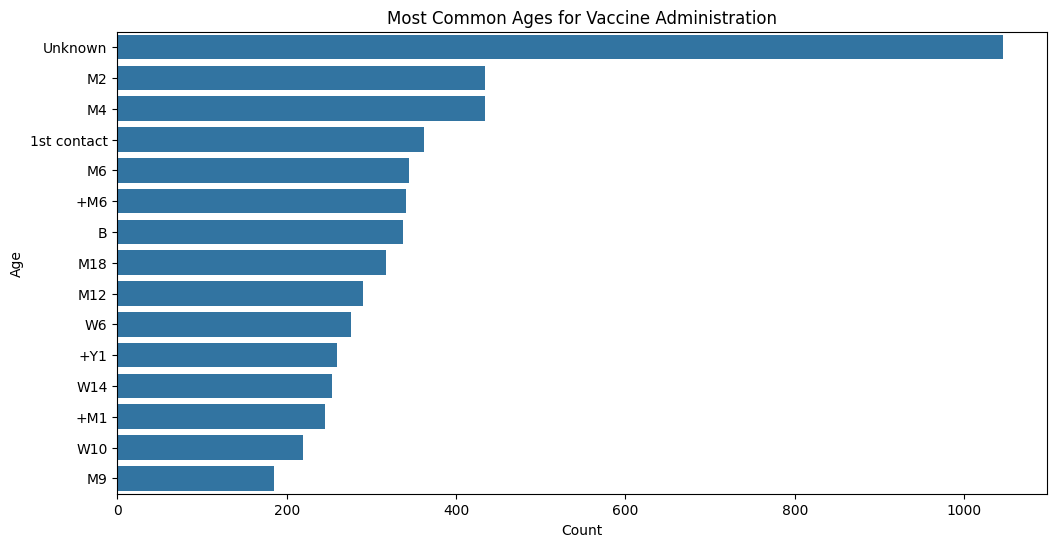

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y="ageadministered", order=df['ageadministered'].value_counts().head(15).index)
plt.title("Most Common Ages for Vaccine Administration")
plt.xlabel("Count")
plt.ylabel("Age")
plt.savefig("../output/Vaccine_Schedule/Most Common Ages for Vaccine Administration.png")
plt.show()

## Target population Analysis

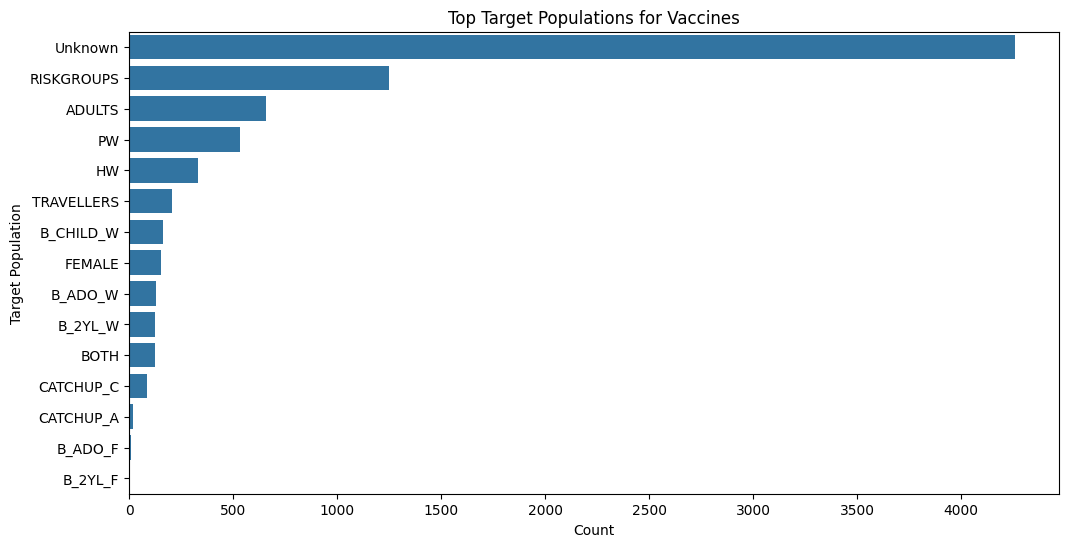

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y="targetpop", order=df['targetpop'].value_counts().head(15).index)
plt.title("Top Target Populations for Vaccines")
plt.xlabel("Count")
plt.ylabel("Target Population")
plt.savefig("../output/Vaccine_Schedule/Top Target Populations for Vaccines.png")
plt.show()

## Risk group vaccination trend

In [26]:
risk_group_trend = df.groupby("year")['is_risk_group'].sum().reset_index()

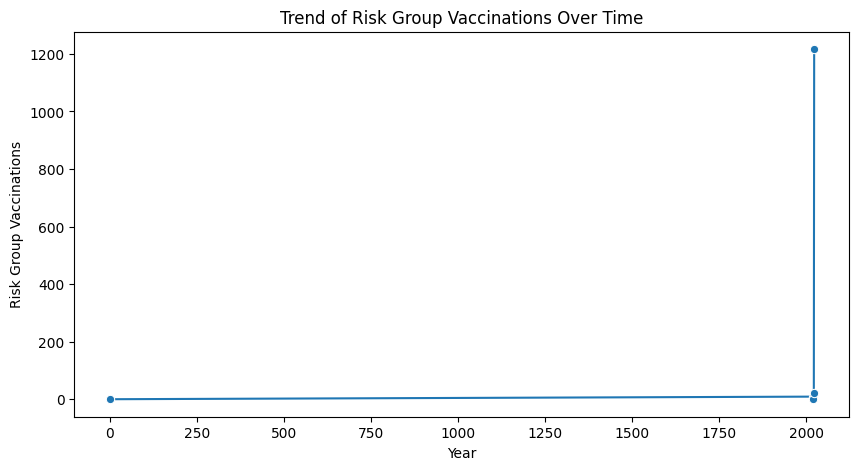

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(data=risk_group_trend, x="year", y="is_risk_group", marker="o")
plt.title("Trend of Risk Group Vaccinations Over Time")
plt.xlabel("Year")
plt.ylabel("Risk Group Vaccinations")
plt.savefig("../output/Vaccine_Schedule/Trend of Risk Group Vaccinations Over Time.png")
plt.show()